# Introduction

This project consisted in building a machine learning model (logistic regression mainly), which tried to predict if a person would make more than $50K a year, given data like education, gender, marital status and so on. Also, I built other machine learning models with the simple purpose of making a comparison between different algorithms. 
In the end, I created a recommendation for individuals willing to learn more than \\$50K per year.

**Attribute Information**:

*age*: continuous.

*workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

*fnlwgt*: continuous.

*education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

*education-num*: continuous.

*marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

*occupation*: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

*relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

*race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

*sex*: Female, Male.

*capital-gain*: continuous.

*capital-loss*: continuous.

*hours-per-week*: continuous.

*native-country*: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

*label*: <=50K, >50K

# Exercise 1

<a id='Step1'></a>

## Step 1: Importing the libraries & Loading the dataset

1. Importing the necessary libraries

In [79]:
# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')
%pylab inline
pylab.rcParams['figure.figsize'] = (17, 12)

# Machine Learning Algorithms
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import scipy.stats as spst
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier , AdaBoostClassifier , ExtraTreesClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score , StratifiedKFold , GridSearchCV , learning_curve

Populating the interactive namespace from numpy and matplotlib


C:\Users\Raluca\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cumsum']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


2. Loading the dataset

In [80]:
income = pd.read_csv("data_train.csv")

<a id='Step2'></a>

# Step 2: Data Exploration
We will see how our data look like, use the describe function for the key statistics, use the shape function (how many rows and columns are in our dataset).

In [81]:
income.head(20)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,2832,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,8228,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
5,14864,37,Self-emp-inc,26698,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,1485,44,United-States,>50K
6,9220,55,Private,170169,HS-grad,9,Separated,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
7,3623,31,Private,247328,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,Mexico,<=50K
8,28966,39,Federal-gov,184964,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,>50K
9,8257,19,Private,351040,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K


In [82]:
print(income.shape)

(29304, 16)


There are 29304 rows and 16 columns, but we notice that the first column ('Unnamed: 0') doesn't present any interest for us, so a good idea is to drop this column.

In [83]:
# Dropping the first column
income = income.drop(columns=['Unnamed: 0'])

# The types of our columns 
income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
label             object
dtype: object

We notice that our dataset has both numerical and categorical data as well. Thus, we have 6 numerical columns with numerical data and 9 categorical columns with categorical data.

###### Describing the data

In [84]:
income.describe()
income.workclass.unique()

array([' Local-gov', ' Private', ' State-gov', ' Self-emp-not-inc',
       ' Self-emp-inc', ' Federal-gov', ' ?', ' Without-pay',
       ' Never-worked'], dtype=object)

<a id="Step3"></a>

## Step 3: Data Cleaning
Checking if there is any null value on the dataframe and finding a way to handle them. We'll also analyze the columns and we'll see if we have to modify them as well.

In [85]:
# Method 1
print('Method 1: \n\n',income.isnull().any(),'\n\n')

# Method 2
print('Method 2: \n')
income.info()

Method 1: 

 age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
label             False
dtype: bool 


Method 2: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29304 entries, 0 to 29303
Data columns (total 15 columns):
age               29304 non-null int64
workclass         29304 non-null object
fnlwgt            29304 non-null int64
education         29304 non-null object
education-num     29304 non-null int64
marital-status    29304 non-null object
occupation        29304 non-null object
relationship      29304 non-null object
race              29304 non-null object
sex               29304 non-null object
capital-gain      29304 non-null int64
capital-loss      29304 non-null int64
hours-per-week  

In the first instance, we notice that our dataset doesn't have null value. But sometimes, null values are represented by special characters (i.e. '?').  Thus, we should check unique values for each column to find them. We'll iterate through our dataset and display the unique values of each column.

In [86]:
for col in income:
    print("The unique values of '{}' column are: {}".format(col,income[col].unique()))

The unique values of 'age' column are: [34 20 26 57 48 37 55 31 39 19 23 28 43 41 46 21 64 38 59 52 45 65 22 32
 56 58 33 42 81 51 18 35 67 36 24 61 25 49 53 50 54 29 30 44 27 84 63 62
 40 17 47 68 60 73 71 66 69 76 72 75 78 74 70 88 79 80 90 82 86 77 83 85
 87]
The unique values of 'workclass' column are: [' Local-gov' ' Private' ' State-gov' ' Self-emp-not-inc' ' Self-emp-inc'
 ' Federal-gov' ' ?' ' Without-pay' ' Never-worked']
The unique values of 'fnlwgt' column are: [144182 100605 152457 ...  59202 122112 172612]
The unique values of 'education' column are: [' Preschool' ' HS-grad' ' Some-college' ' 9th' ' Assoc-acdm' ' Bachelors'
 ' 11th' ' Prof-school' ' Assoc-voc' ' 10th' ' Masters' ' 7th-8th' ' 12th'
 ' Doctorate' ' 5th-6th' ' 1st-4th']
The unique values of 'education-num' column are: [ 1  9 10  5 12 13  7 15 11  6 14  4  8 16  3  2]
The unique values of 'marital-status' column are: [' Never-married' ' Married-civ-spouse' ' Separated' ' Divorced'
 ' Widowed' ' Married-spouse-

We notice that *'workclass'*, *'occupation'* and *'native-country'* have ' ?' characters, so we must find a way to handle these missing values.

First of all, we should replace those ' ?' values from those 3 columns into np.NaN (null).

In [87]:
income.replace(" ?", np.nan, inplace = True)
income.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
5,37,Self-emp-inc,26698,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,1485,44,United-States,>50K
6,55,Private,170169,HS-grad,9,Separated,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
7,31,Private,247328,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,Mexico,<=50K
8,39,Federal-gov,184964,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,>50K
9,19,Private,351040,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K


##### Check for missing data

Since the ' ?' symbol is now replaced with NaN which is null value, these are easily recognised and computed to check for the summation of the missing data available in the dataset.

In [88]:
missing_data = income.isnull().sum()
missing_data

age                  0
workclass         1650
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1655
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     527
label                0
dtype: int64

From this statistics, we get a total no of 1650 workclass data, 1655 occupation data, and 527 native country data missing from the existing dataset.

In [89]:
missing_col = []
for column in income.columns.values.tolist():
    if(missing_data[column] > 0):
        print("Column: ",column)
        print("Missing Data: {} ({:.2f}%)".format(missing_data[column], (missing_data[column] * 100/ len(income))))
        print("Data Type: ",income[column].dtypes)
        print("")
        missing_col.append(column)

Column:  workclass
Missing Data: 1650 (5.63%)
Data Type:  object

Column:  occupation
Missing Data: 1655 (5.65%)
Data Type:  object

Column:  native-country
Missing Data: 527 (1.80%)
Data Type:  object



As we can see from above statistics, we have **3** *missing columns*:
1. *workclass* : 1836 missing data (5.63%)
2. *occupation*: 1843 missing data (5.65%)
3. *native-country*: 583 missing data (1.80%)

##### Impact of Missing Data on our Dataset

We'll plot our Good vs. Missing Data in order to get an idea about the proportion between these 2 variables and to establish what we're doing in the next phase.

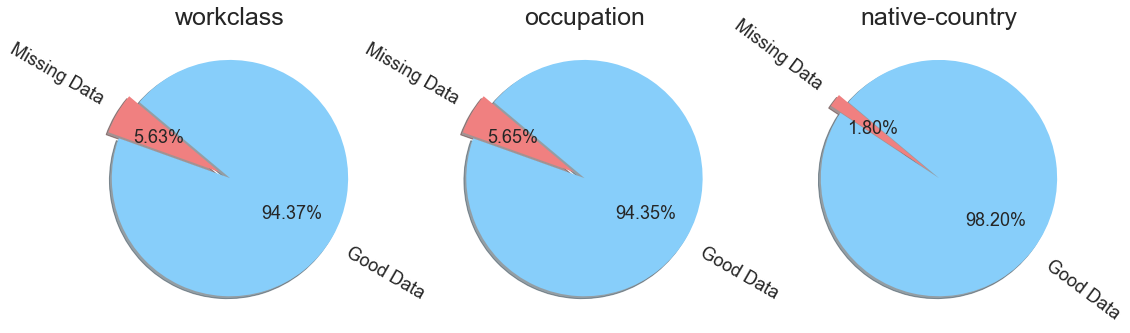

In [90]:
fig = plt.figure(figsize=(18,6))
i = 0

for column in missing_col:
    bad = missing_data[column].sum()
    good = len(income) - missing_data[column].sum()
    x = [bad, good]
    labels = 'Missing Data', 'Good Data'
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode 1st slice
    i = i+1
    fig.add_subplot(1,3,i)
    
    # Plot
    plt.title(column, fontsize = 25)
    plt.pie(x, explode=explode, labels=labels, colors=colors,
    autopct='%.2f%%', shadow=True, startangle=140, rotatelabels = True, textprops={'fontsize': 18})
    
plt.show()


### Fix Missing Data

We have 2 ways in which we can handle the missing data:

1. Drop data 
    1. drop the whole row
    2. drop the whole column
2. Replace data
    1. replace it by mean
    2. replace it by frequency
    3. replace it based on other features/functions

Since we have only categorical missing data we will replace the data by Frequency or Mode.
We will fill the missing values with their modes.

In [91]:
# Calculate Mode
workclass_mode = income['workclass'].mode()
occupation_mode = income['occupation'].mode()
native_country_mode = income['native-country'].mode()

print("Mode of workclass: ",workclass_mode[0])
print("Mode of Occupation: ",occupation_mode[0])
print("Mode of Native Country: ",native_country_mode[0])

income.workclass.replace(np.nan, workclass_mode[0], inplace = True)
income.occupation.replace(np.nan, occupation_mode[0], inplace = True)
income['native-country'].replace(np.nan, native_country_mode[0], inplace = True)

income.head(20)

Mode of workclass:   Private
Mode of Occupation:   Prof-specialty
Mode of Native Country:   United-States


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
5,37,Self-emp-inc,26698,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,1485,44,United-States,>50K
6,55,Private,170169,HS-grad,9,Separated,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
7,31,Private,247328,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,Mexico,<=50K
8,39,Federal-gov,184964,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,>50K
9,19,Private,351040,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K


Now, let’s explore the correlation between the different features. For this purpose we will need to encode the categorical features as numerical. This can be done using the LabelEncoder from the scikit-learn package.

<a id="corr1"></a>

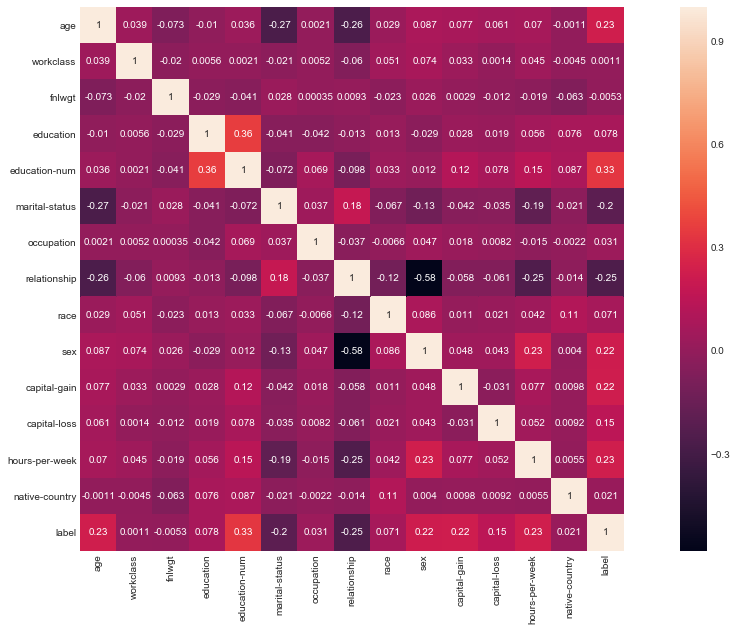

In [92]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(income)
plt.figure(figsize=(20, 10))
sns.heatmap(encoded_data.corr(), annot=True, square=True)
plt.show()


We see there is a *high correlation* between **Education** and **Education-Num**. Let’s look at these columns

In [93]:
income[['education','education-num']].head(20)

,education,education-num
0,Preschool,1
1,HS-grad,9
2,HS-grad,9
3,Some-college,10
4,HS-grad,9
5,Some-college,10
6,HS-grad,9
7,9th,5
8,Some-college,10
9,Some-college,10


The column **'education'** is just a *string* representation of the **'education-num'** column. We don’t need the string representation, so we can just drop this column. I think it is a much better option to delete the Education column as the Education-Num has the important property that the values are ordered: the higher the number, the higher the education that person has. This is an important information for later use.

In [94]:
income = income.drop(columns=['education'])
income.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,34,Local-gov,144182,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,20,Private,100605,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,26,State-gov,152457,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,57,Self-emp-not-inc,353808,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,48,State-gov,122086,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K


We also notice from the [above correlation matrix](#corr1) that the data is mostly ok, with the exception of *Sex* and *Relationship* which are negatively correlated. We'll take a look at these 2 columns.

In [95]:
income[["sex", "relationship"]].head(20)

,sex,relationship
0,Female,Own-child
1,Male,Own-child
2,Male,Not-in-family
3,Male,Husband
4,Male,Husband
5,Male,Husband
6,Female,Not-in-family
7,Male,Husband
8,Male,Not-in-family
9,Female,Own-child


The data looks correlated, because for example, Male and Husband are highly correlated values, as well as Female and Wife. There is no easy way to tackle this problem, so we'll carry on.

#### We'll create a copy of our income data

In [96]:
income_copy = income.copy()

In [97]:
income_copy.head(20)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,34,Local-gov,144182,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,20,Private,100605,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,26,State-gov,152457,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,57,Self-emp-not-inc,353808,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,48,State-gov,122086,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
5,37,Self-emp-inc,26698,10,Married-civ-spouse,Sales,Husband,White,Male,0,1485,44,United-States,>50K
6,55,Private,170169,9,Separated,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
7,31,Private,247328,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,Mexico,<=50K
8,39,Federal-gov,184964,10,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,>50K
9,19,Private,351040,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K


In [98]:
# Checking if we still have null values.

income_copy.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

NO Null Values are present in our new dataset.

<a id="Step4"></a>

## Step 4: Converting Categorical Variables to Continuous Variables

In [99]:
income_copy.workclass = income_copy.workclass.astype('category')
#wclass = np.argmax(pd.get_dummies(income_copy.workclass).values, axis = 1)
# income_copy.replace(income_copy.workclass, wclass)
income_copy.workclass = income_copy.workclass.cat.codes

income_copy['marital-status'] = income_copy['marital-status'].astype('category')
# marital = np.argmax(pd.get_dummies(income_copy['marital-status']).values, axis = 1)
# income_copy.replace(income_copy['marital-status'], marital)
income_copy['marital-status'] = income_copy['marital-status'].cat.codes

income_copy.occupation = income_copy.occupation.astype('category')
# occupation = np.argmax(pd.get_dummies(income_copy.occupation).values, axis = 1)
# income_copy.replace(income_copy.occupation, occupation)
income_copy.occupation = income_copy.occupation.cat.codes

income_copy.relationship = income_copy.relationship.astype('category')
# relationship = np.argmax(pd.get_dummies(income_copy.relationship).values, axis = 1)
# income_copy.replace(income_copy.relationship, relationship)
income_copy.relationship = income_copy.relationship.cat.codes

income_copy.race = income_copy.race.astype('category')
# race = np.argmax(pd.get_dummies(income_copy.race).values, axis = 1)
# income_copy.replace(income_copy.race, race)
income_copy.race = income_copy.race.cat.codes

income_copy.sex = income_copy.sex.astype('category')
# sex = np.argmax(pd.get_dummies(income_copy.workclass).values, axis = 1)
# income_copy.replace(income_copy.sex, sex)
income_copy.sex = income_copy.sex.cat.codes

income_copy['native-country'] = income_copy['native-country'].astype('category')
# natCountry = np.argmax(pd.get_dummies(adult_incom['native-country']).values, axis = 1)
# adult_income.replace(adult_income['native-country'], natCountry)
income_copy['native-country'] = income_copy['native-country'].cat.codes

income_copy.label = income_copy.label.astype('category')
# label = np.argmax(pd.get_dummies(adult_income.label).values, axis = 1)
# adult_income.replace(adult_income.label, label)
income_copy.label = income_copy.label.cat.codes

In [100]:
income_copy.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,34,1,144182,1,4,0,3,2,0,0,0,25,38,0
1,20,3,100605,9,4,11,3,3,1,0,0,40,32,0
2,26,6,152457,9,4,10,1,4,1,0,0,40,38,0
3,57,5,353808,10,2,11,0,4,1,0,0,60,38,1
4,48,6,122086,9,2,10,0,4,1,0,0,40,38,0
5,37,4,26698,10,2,11,0,4,1,0,1485,44,38,1
6,55,3,170169,9,5,0,1,4,0,0,0,40,38,0
7,31,3,247328,5,2,6,0,4,1,3137,0,40,25,0
8,39,0,184964,10,0,0,1,4,1,0,0,40,38,1
9,19,3,351040,10,4,0,3,4,0,0,0,40,32,0


##### Checking the types of our brand new replaced categorical columns

In [101]:
income_copy.dtypes

age               int64
workclass          int8
fnlwgt            int64
education-num     int64
marital-status     int8
occupation         int8
relationship       int8
race               int8
sex                int8
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country     int8
label              int8
dtype: object

In [102]:
work = income.workclass.astype('category')
dwork = dict(enumerate(work.cat.categories))
mars = income['marital-status'].astype('category')
dmars = dict(enumerate(mars.cat.categories))
occup = income.occupation.astype('category')
doccup = dict(enumerate(occup.cat.categories))
relationship = income.relationship.astype('category')
drelationship = dict(enumerate(relationship.cat.categories))
race = income.race.astype('category')
drace = dict(enumerate(race.cat.categories))
sex = income.sex.astype('category')
dsex = dict(enumerate(sex.cat.categories))
country = income['native-country'].astype('category')
dcountry = dict(enumerate(country.cat.categories))
income = income.label.astype('category')
dincome = dict(enumerate(income.cat.categories))

print("Workclass:",dwork,'\n')
print("Marital Status:",dmars,'\n')
print("Occupation:",doccup,'\n')
print("Relationship:",drelationship,'\n')
print("Race:",drace,'\n')
print("Sex:",dsex,'\n')
print("Native Country:",dcountry,'\n')
print("Label:",dincome,'\n')

Workclass: {0: ' Federal-gov', 1: ' Local-gov', 2: ' Never-worked', 3: ' Private', 4: ' Self-emp-inc', 5: ' Self-emp-not-inc', 6: ' State-gov', 7: ' Without-pay'} 

Marital Status: {0: ' Divorced', 1: ' Married-AF-spouse', 2: ' Married-civ-spouse', 3: ' Married-spouse-absent', 4: ' Never-married', 5: ' Separated', 6: ' Widowed'} 

Occupation: {0: ' Adm-clerical', 1: ' Armed-Forces', 2: ' Craft-repair', 3: ' Exec-managerial', 4: ' Farming-fishing', 5: ' Handlers-cleaners', 6: ' Machine-op-inspct', 7: ' Other-service', 8: ' Priv-house-serv', 9: ' Prof-specialty', 10: ' Protective-serv', 11: ' Sales', 12: ' Tech-support', 13: ' Transport-moving'} 

Relationship: {0: ' Husband', 1: ' Not-in-family', 2: ' Other-relative', 3: ' Own-child', 4: ' Unmarried', 5: ' Wife'} 

Race: {0: ' Amer-Indian-Eskimo', 1: ' Asian-Pac-Islander', 2: ' Black', 3: ' Other', 4: ' White'} 

Sex: {0: ' Female', 1: ' Male'} 

Native Country: {0: ' Cambodia', 1: ' Canada', 2: ' China', 3: ' Columbia', 4: ' Cuba', 5: 

The coded above displayed a list with the cat codes of our categorical data

Workclass: {0: ' Federal-gov', 1: ' Local-gov', 2: ' Never-worked', 3: ' Private', 4: ' Self-emp-inc', 5: ' Self-emp-not-inc', 6: ' State-gov', 7: ' Without-pay'} 

Marital Status: {0: ' Divorced', 1: ' Married-AF-spouse', 2: ' Married-civ-spouse', 3: ' Married-spouse-absent', 4: ' Never-married', 5: ' Separated', 6: ' Widowed'} 

Occupation: {0: ' Adm-clerical', 1: ' Armed-Forces', 2: ' Craft-repair', 3: ' Exec-managerial', 4: ' Farming-fishing', 5: ' Handlers-cleaners', 6: ' Machine-op-inspct', 7: ' Other-service', 8: ' Priv-house-serv', 9: ' Prof-specialty', 10: ' Protective-serv', 11: ' Sales', 12: ' Tech-support', 13: ' Transport-moving'} 

Relationship: {0: ' Husband', 1: ' Not-in-family', 2: ' Other-relative', 3: ' Own-child', 4: ' Unmarried', 5: ' Wife'} 

Race: {0: ' Amer-Indian-Eskimo', 1: ' Asian-Pac-Islander', 2: ' Black', 3: ' Other', 4: ' White'} 

Sex: {0: ' Female', 1: ' Male'} 

Native Country: {0: ' Cambodia', 1: ' Canada', 2: ' China', 3: ' Columbia', 4: ' Cuba', 5: ' Dominican-Republic', 6: ' Ecuador', 7: ' El-Salvador', 8: ' England', 9: ' France', 10: ' Germany', 11: ' Greece', 12: ' Guatemala', 13: ' Haiti', 14: ' Holand-Netherlands', 15: ' Honduras', 16: ' Hong', 17: ' Hungary', 18: ' India', 19: ' Iran', 20: ' Ireland', 21: ' Italy', 22: ' Jamaica', 23: ' Japan', 24: ' Laos', 25: ' Mexico', 26: ' Nicaragua', 27: ' Outlying-US(Guam-USVI-etc)', 28: ' Peru', 29: ' Philippines', 30: ' Poland', 31: ' Portugal', 32: ' Puerto-Rico', 33: ' Scotland', 34: ' South', 35: ' Taiwan', 36: ' Thailand', 37: ' Trinadad&Tobago', 38: ' United-States', 39: ' Vietnam', 40: ' Yugoslavia'} 

Label: {0: ' <=50K', 1: ' >50K'} 

<a id="Step5"></a>

## Step 5: Data Visualization

Another important step is **Data Visualization**, that provides insight into complex datasets by communicating their key aspects in more intuitive and meaningful ways. 

Data Visualization allows us to:
   * Spot patterns in the data
   * Identify outliers and missing entries
   * Inspect correlations among features
   * Summarize and report results in a clear and efficient way

<a id="ageVSincome"></a>

### Age vs. Income

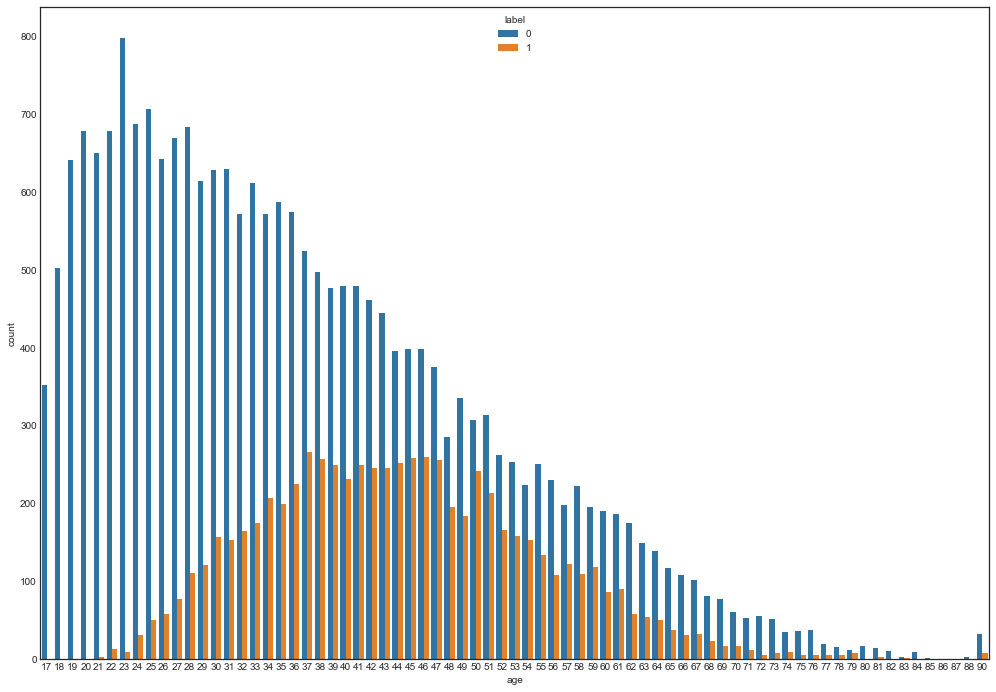

In [103]:
sns.countplot(x='age',hue='label',data=income_copy)

I will also use the boxplot() seaborn function to plot a box plot comparing the distribution of age between those who make <=50K dollars and >50K.

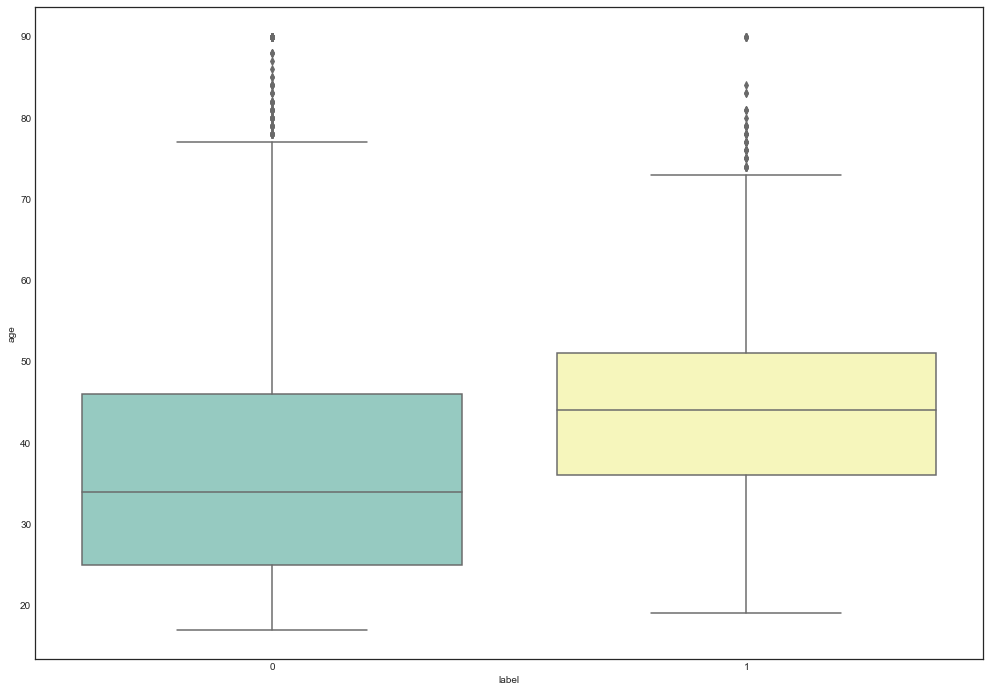

In [104]:
sns.boxplot(x='label',y='age',data=income_copy,palette="Set3")

It is trivial from the graph that the median age of individuals who earn less than 50K dollars is lower than that of the individuals who earn >=50K$, supporting the notion that generally, as age increases, earnings do as well. This is because as workers age, they generally advance up their careers, through, for example, promotions, new knowledge gained, certifications and so on.


Both graphs have outliers whose earnings are extremely large. However, the IQR of the age of the low earning individuals is larger than that of the high earning individuals. Thus, low earning individuals have a greater spread of age than high earning individuals. On the other hand, there is a clear skew towards larger ages with low earning individuals, while high earning individuals have an almost symmetric distribution of ages. That there is so much overlap between the IQR’s of high and low earning individuals further indicates that age may not be the strongest measure of earnings. This is possibly because earnings tend to plateau at around age 38, where savings play a larger part of an individual’s net worth.

<a id="educationVSincome"></a>

### Education-Num vs. Income

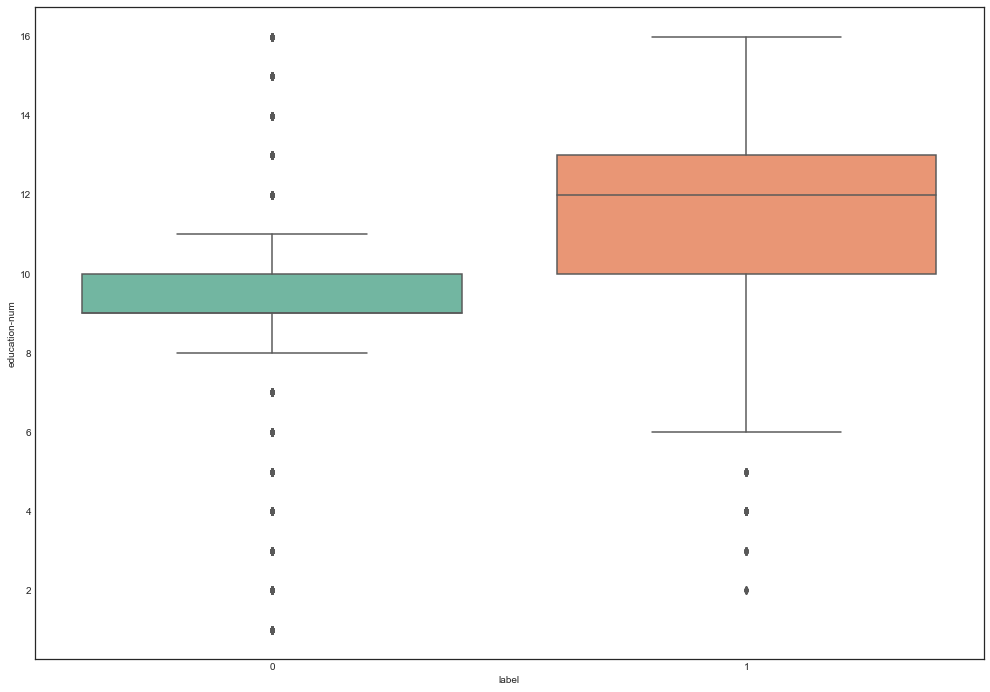

In [105]:
sns.boxplot(x='label', y='education-num', data=income_copy, palette="Set2")

The median education level of high earning individuals is substantially larger than that of low earning individuals, supporting the notion that as education level increases, income does as well. As education increases, workers become more specialized, experienced and they are in higher demand. These high knowledge workers earn more.


While the boxplot for high earning people has outliers in the lower education level range, the boxplot for low earning individuals has outliers in both directions. The IQR of the low earning individuals is much smaller than that of the high earning individuals, indicating that higher earning individuals have a greater spread of educational level. Both boxplots are relatively somewhat symmetric. Since there is very little overlap between the two IQR’s, education level could be effectively used as a factor to separate high and low earning individuals.

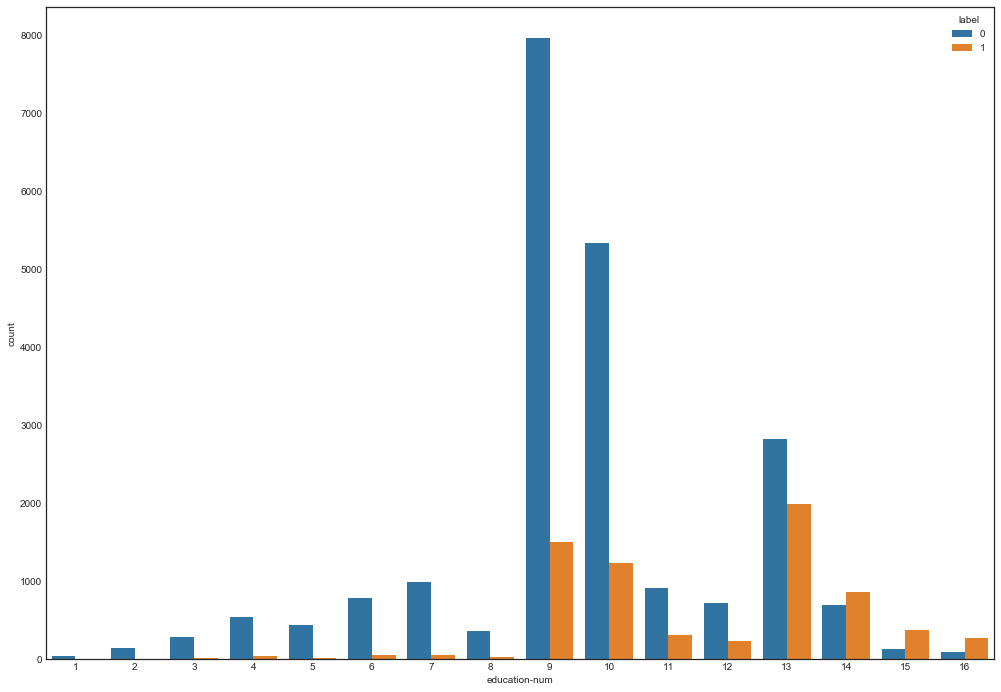

In [106]:
sns.countplot(x='education-num',hue='label',data=income_copy)

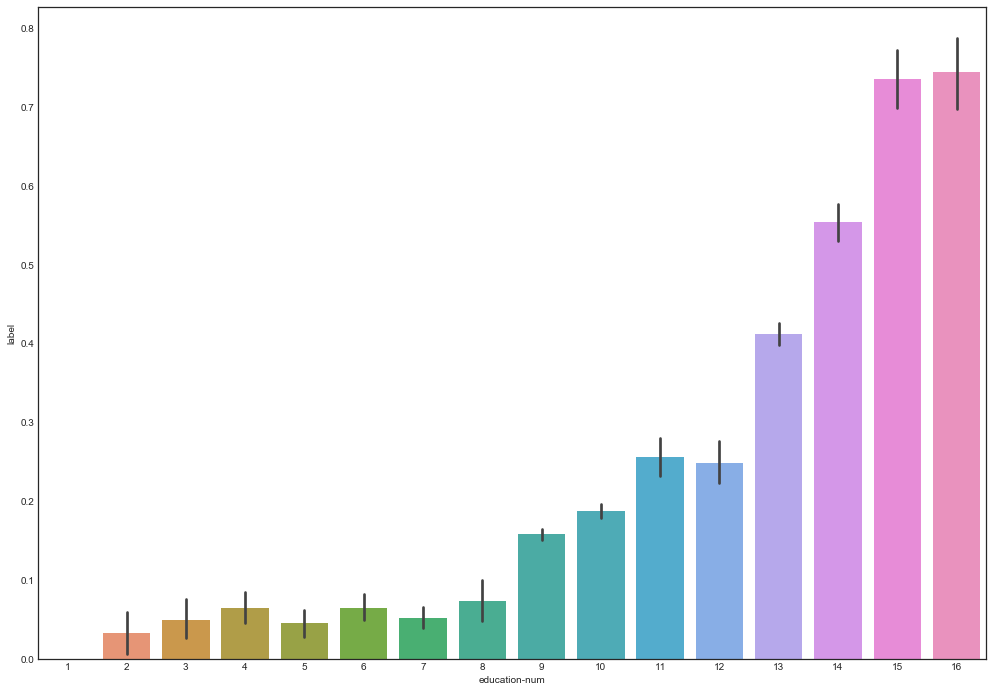

In [107]:
sns.barplot(x='education-num',y='label',data=income_copy)
#plt.hist(income_more_than_50k['education-num'],bins=200)
# Proportion of individuals earning > 50K per education level

As the educational levels of individuals increase, the proportion of individuals that are high earning increases as well. This graph illustrates a strong relationship between Education level and high earning status - as educational level increases, the probability that an entity is earning more than 50K$ increases as well. This is because the level of education very accurately predicts an individual's earnings. The more specialized and advanced a degree an individual holds, the larger their lifetime earnings.

<a id="sexVSincome"></a>

### Sex vs. Income

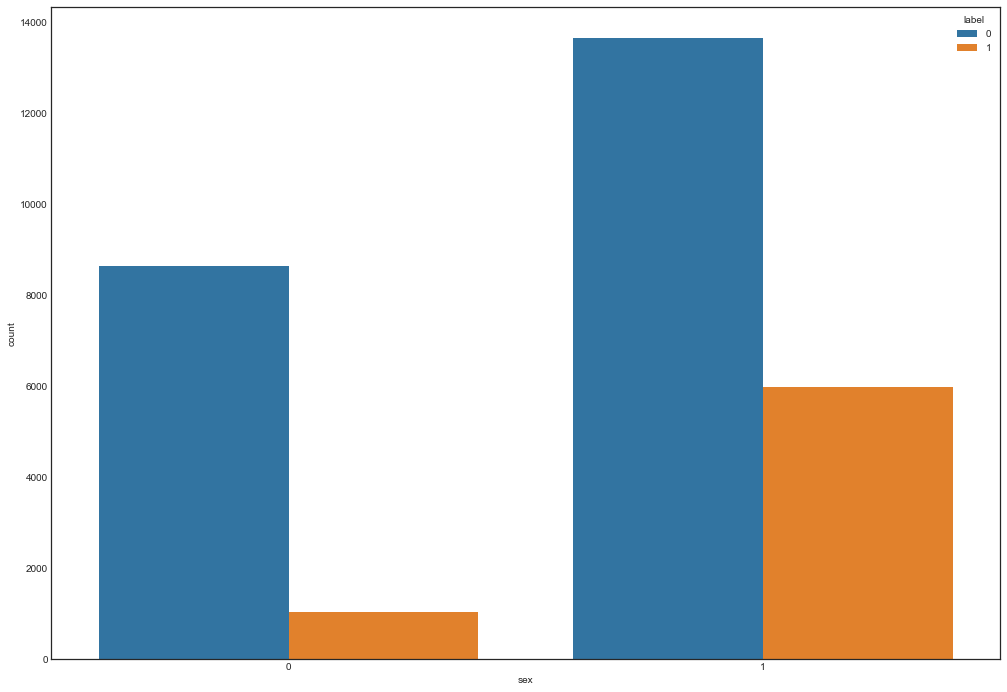

In [108]:
sns.countplot(x='sex',hue='label',data=income_copy)

In [109]:
print('There are {} women and {} men.'.format(income_copy[income_copy['sex']==0]['sex'].count(),\
                                              income_copy[income_copy['sex']==1]['sex'].count()))

There are 9681 women and 19623 men.


- We notice that more men earn >50K\\$ per year
- We must be aware of the fact that we don't have gender-balanced data.
- If there were gender-balanced data, then we would have drawn some conclusions about this feature.

<a id="occupationVSincome"></a>

### Occupation vs. Income

Text(0.5, 1.0, 'Label with Occupation')

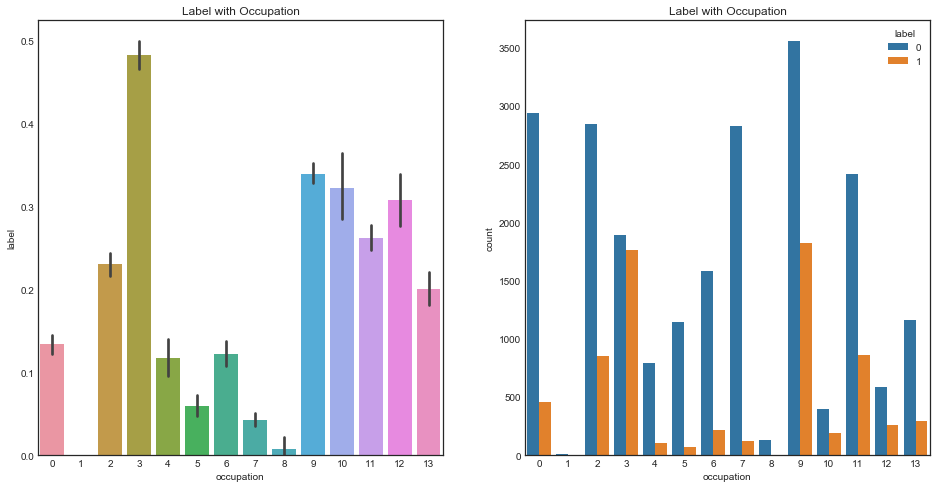

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(x='occupation', y='label', data=income_copy, ax=ax[0])
ax[0].set_title('Label with Occupation')
sns.countplot(x='occupation', hue='label', data=income_copy, ax=ax[1])
ax[1].set_title('Label with Occupation')

- We can say that individuals that work as executive managers and proffesors are the ones who learn more than \\$50K.

<a id = 'workclassVSincome'></a>

### Workclass vs. Income

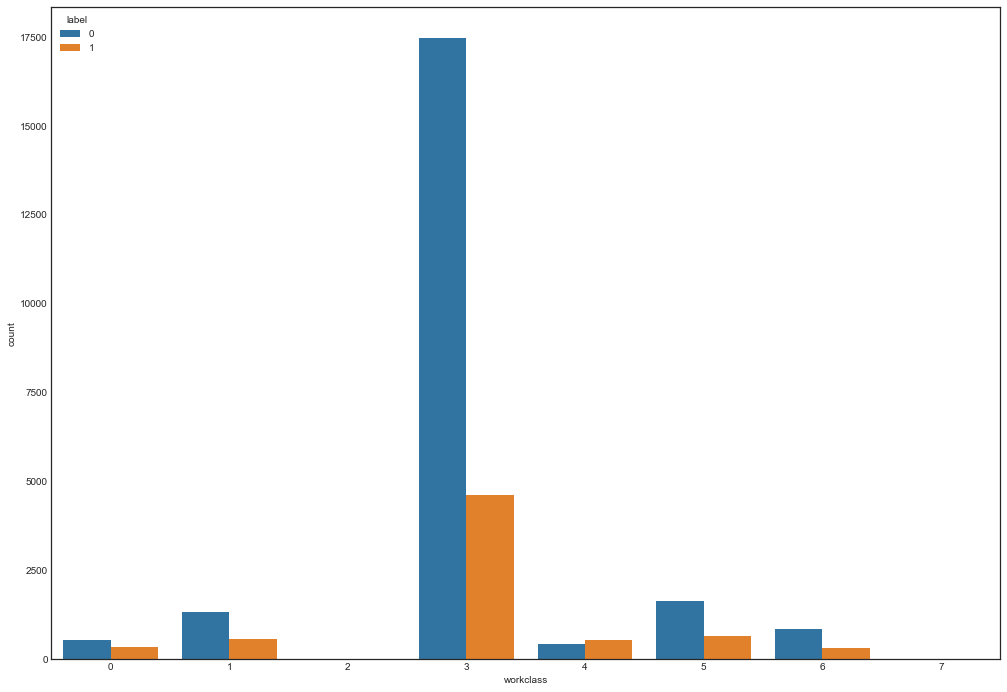

In [111]:
sns.countplot(x='workclass',hue='label',data=income_copy)

We can notice that those who work in Private sector are numerous than the other individuals.

<a id="hoursperweekVSincome"></a>

### Hours per week vs. Income

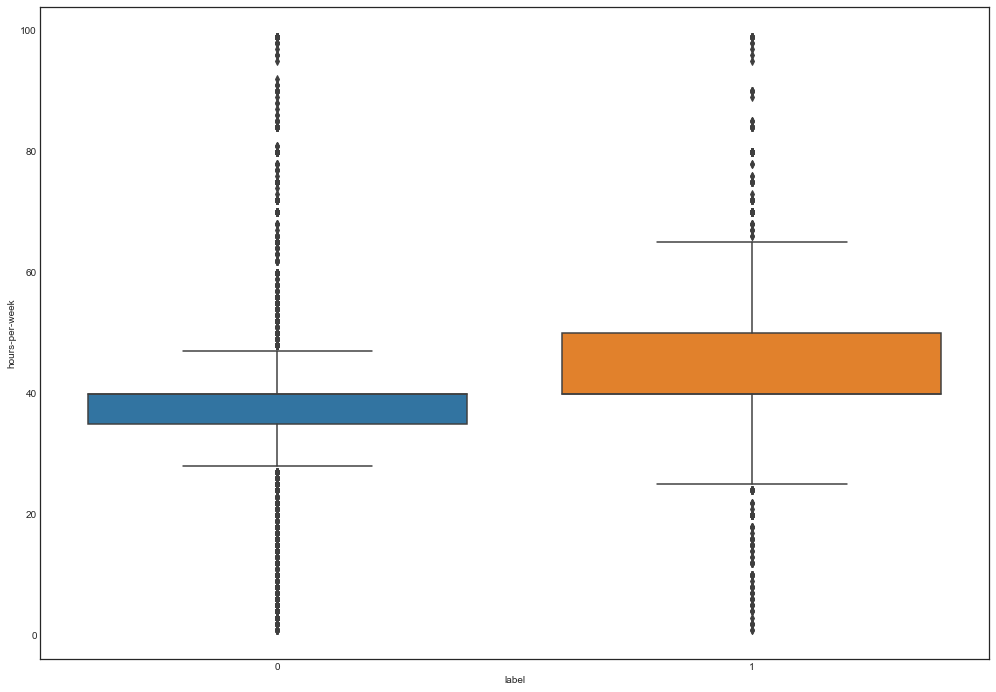

In [112]:
sns.boxplot(x="label", y="hours-per-week", data=income_copy)

The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.

- Income group who earns >50k spend ~44 "hours-per-week" (long hours)

- Income group who earns <=50k spend ~37 "hours-per-week".


- The boxplot for Income group who earns <=50k has small range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.~[28,48].But the boxplot for Income group who earns >50k has large range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.~[23,68].


- Income group who earns >50k have flexible working hours
- More Outliers present in the Income group who earns <=50k.

<a id="relationship"></a>

### Relationship and Marital Status vs. Income

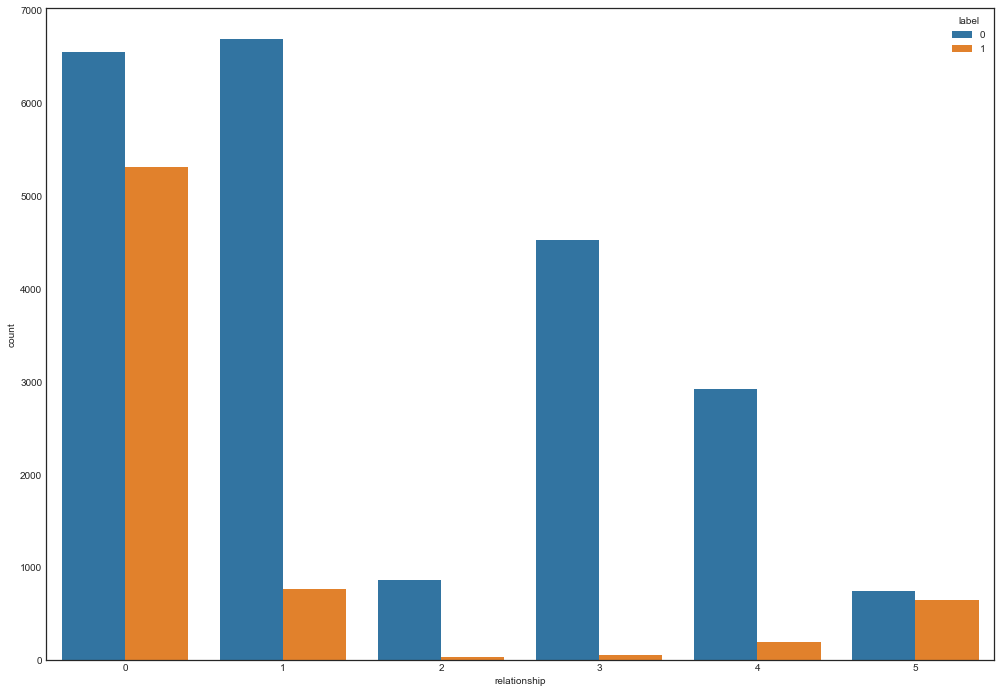

In [113]:
sns.countplot(x='relationship',hue='label',data=income_copy)

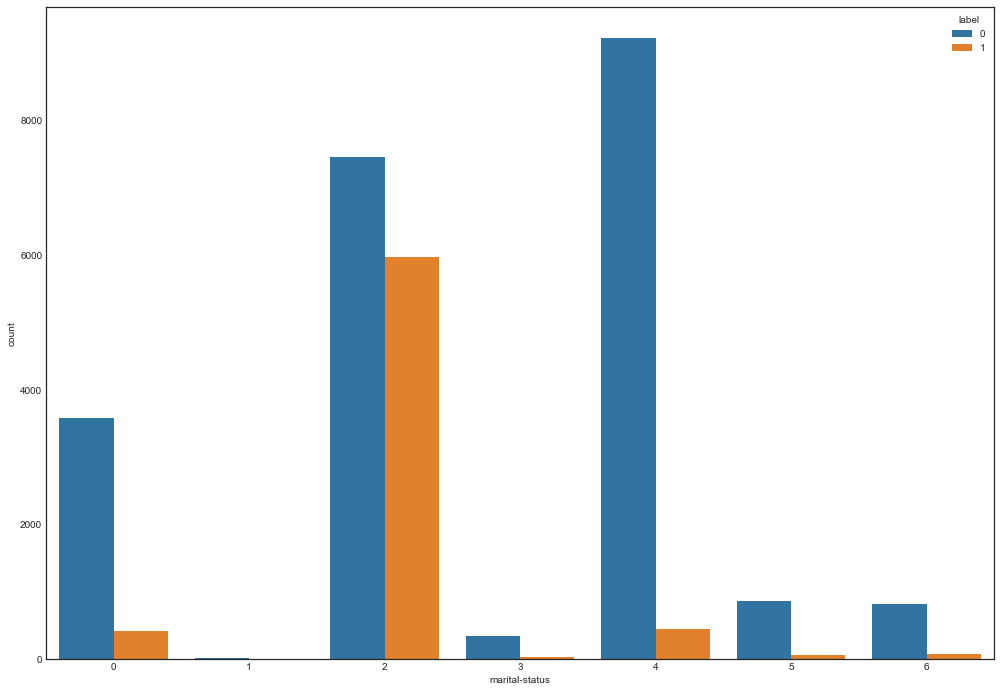

In [114]:
sns.countplot(x='marital-status',hue='label',data=income_copy)

- We notice that men, mostly those who are husbands earn more than \$50K than women, mostly wives as well. Again, the discrepance between males and females is really big.

- We also notice, from the 2nd plot, that married men earn more than someone divorced or never-married for example.

<a id="raceVSincome"></a>

### Race vs. Income

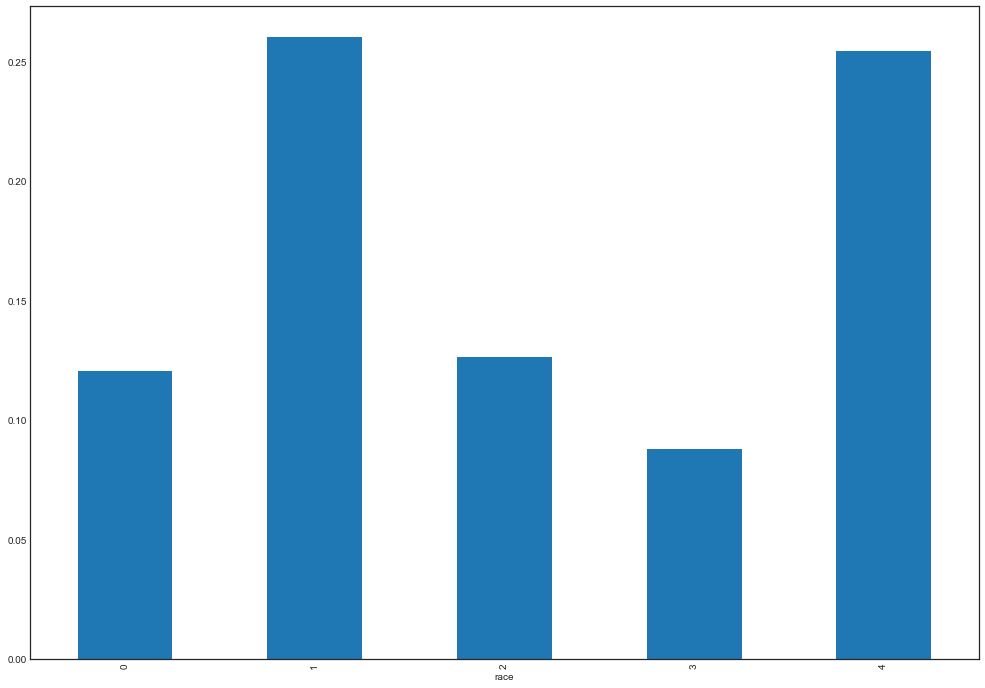

In [115]:
income_copy.groupby('race').label.mean().plot(kind='bar')

- We notice that White, Asian-Pac-Islanders have the highest chances to earn more.

<a id='Step6'></a>

## Step 6: Finding the correlations between our features

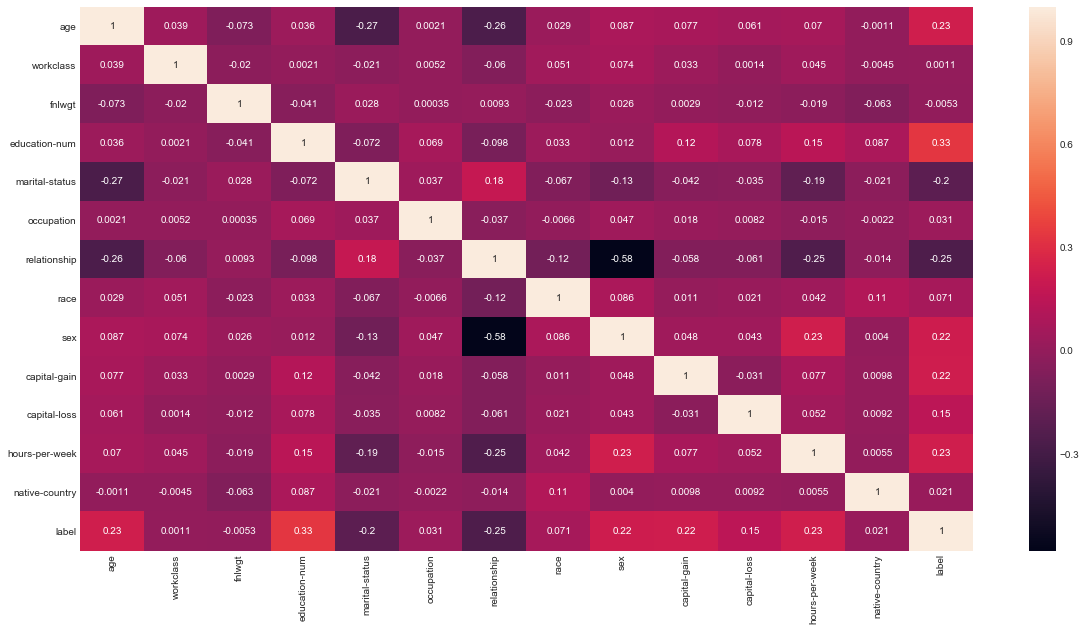

In [116]:
corr = income_copy[['age', 'workclass', 'fnlwgt', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'label']].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()

- We notice that our 'label' is high correlated with 'education-num', 'age', 'hours-per-week', 'sex' ,'capital-gain'. 

<a id="Step7"></a>

## Step 7: Building the Model

In [117]:
# Putting independent variables/features to X
X = income_copy.drop(columns = ['label'])

# Putting response/dependent variable/feature to y
y = income_copy.label

#### Spliting data into separate training and test set

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Feature scaling

In [119]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

X_train.head()

C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Raluca\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  """


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.123138,-0.084602,1.376191,-0.422443,-1.728226,1.212288,1.595853,0.389912,-1.426138,-0.146826,-0.213087,-0.042357,0.259512
1,-1.149294,-1.891335,0.298906,1.135477,0.922442,0.710245,-0.273316,-1.983342,-1.426138,-0.146826,-0.213087,-0.042357,0.259512
2,0.023456,-0.084602,-0.389519,-0.422443,-0.402892,-1.046906,-0.896373,0.389912,0.701194,-0.146826,-0.213087,-0.042357,0.259512
3,-1.222591,-0.084602,1.104655,-0.032963,0.922442,-0.293842,0.972797,0.389912,0.701194,-0.146826,-0.213087,0.767202,0.259512
4,-0.196435,1.722130,-0.354105,1.135477,-0.402892,0.710245,-0.896373,0.389912,0.701194,-0.146826,-0.213087,0.362423,0.259512


<a id="logisticRegressionAll"></a>

### 1) Logistic Regression with all features

In [120]:
logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(X_train, y_train)

y_pred_train = logisticRegression.predict(X_train)
y_pred_test = logisticRegression.predict(X_test)


print('Logistic Regression accuracy score with all features for Train data: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Logistic Regression accuracy score with all features for Test data: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Logistic Regression accuracy score with all features for Train data: 0.8242
Logistic Regression accuracy score with all features for Test data: 0.8319


##### Cross-Validation

In [121]:
cross_val_model = LogisticRegression(random_state=0,solver='lbfgs')
scores = cross_val_score(cross_val_model, X_train, 
         y_train, cv=5)
print(scores,'\n')
print('Accuracy with cross-validation: {}'.format(np.mean(scores)))

[0.81818182 0.8291494  0.82740127 0.8196002  0.82715748] 

Accuracy with cross-validation: 0.824298033582591


<a id="logisticRegressionPCA"></a>

### 2) Logistic Regression with PCA

 We are interested in the top 5-10 features that best discriminate between the classes. This is a feature selection problem (as opposed to feature transformation accomplished through PCA)

 We'll use the mutual_info_classif criterion which measures the mutual information between a numerical feature and a categorical feature (our class column). SelectKBest will compute a discrepancy metric (in our case mutual_info_classif) between each numerical column and the class column and return the top k features with the hightest score

#### 1) Top 3 features

In [122]:
numFeatures = 3
targetData = y_train # the class column from the dataframe
numericalData = X_train # the standardized numerical data from the previous paragraph

# Assuring that we don't have NaN values in numericalData - we should get 0

print('There are {} numerical values'.format(numericalData.isnull().sum().sum()))

best_features = SelectKBest(mutual_info_classif, k=numFeatures).fit_transform(numericalData,targetData)

print("Printing the first 5 best features:\n",best_features[:5])

There are 0 numerical values
Printing the first 5 best features:
 [[-1.72822578  1.59585293 -0.1468255 ]
 [ 0.92244192 -0.27331617 -0.1468255 ]
 [-0.40289193 -0.89637253 -0.1468255 ]
 [ 0.92244192  0.97279657 -0.1468255 ]
 [-0.40289193 -0.89637253 -0.1468255 ]]


**Finding the corresponding columns for each value**

In [123]:
def searchForColumn(value):
    for i in numericalData.columns:
        if numericalData[i][0] == value:
            return i

In [124]:
col=[]
for i in range(3):
    col.append(searchForColumn(best_features[0][i]))

col

['marital-status', 'relationship', 'capital-gain']

We'll use these 5 features for our model.

In [125]:
X_3features = income_copy.loc[:,['marital-status', 'relationship', 'capital-gain']]

X_train_3features, X_test_3features, y_train_3features, y_test_3features = train_test_split(X_3features, y, test_size = 0.3, random_state = 0)

logisticRegression = LogisticRegression(solver='liblinear')
logisticRegression.fit(X_train_3features, y_train_3features)

y_pred_train3 = logisticRegression.predict(X_train_3features)
y_pred_test3 = logisticRegression.predict(X_test_3features)


print('Logistic Regression accuracy score with PCA (3 features) for Train data: {0:0.4f}'. format(accuracy_score(y_train_3features, y_pred_train3)))
print('Logistic Regression accuracy score with PCA (3 features) for Test data: {0:0.4f}'. format(accuracy_score(y_test_3features, y_pred_test3)))

Logistic Regression accuracy score with PCA (3 features) for Train data: 0.7917
Logistic Regression accuracy score with PCA (3 features) for Test data: 0.7966


#### 2) Top 5 features

In [126]:
numFeatures = 5
targetData = y_train # the class column from the dataframe
numericalData = X_train # the standardized numerical data from the previous paragraph

# Assuring that we don't have NaN values in numericalData - we should get 0

print('There are {} numerical values'.format(numericalData.isnull().sum().sum()))

best_features = SelectKBest(mutual_info_classif, k=numFeatures).fit_transform(numericalData,targetData)

print("Printing the first 5 best features:\n",best_features[:5])

There are 0 numerical values
Printing the first 5 best features:
 [[-0.12313816 -0.42244287 -1.72822578  1.59585293 -0.1468255 ]
 [-1.14929424  1.13547662  0.92244192 -0.27331617 -0.1468255 ]
 [ 0.02345557 -0.42244287 -0.40289193 -0.89637253 -0.1468255 ]
 [-1.22259111 -0.032963    0.92244192  0.97279657 -0.1468255 ]
 [-0.19643502  1.13547662 -0.40289193 -0.89637253 -0.1468255 ]]


In [127]:
col=[]
for i in range(5):
    col.append(searchForColumn(best_features[0][i]))

col

['age', 'education-num', 'marital-status', 'relationship', 'capital-gain']

In [128]:
X_5features = income_copy.loc[:,['age', 'education-num', 'marital-status', 'relationship', 'capital-gain']]

X_train_5features, X_test_5features, y_train_5features, y_test_5features = train_test_split(X_5features, y, test_size = 0.3, random_state = 0)

logisticRegression = LogisticRegression(solver='liblinear')
logisticRegression.fit(X_train_5features, y_train_5features)

y_pred_train5 = logisticRegression.predict(X_train_5features)
y_pred_test5 = logisticRegression.predict(X_test_5features)


print('Logistic Regression accuracy score with PCA (5 features) for Train data: {0:0.4f}'. format(accuracy_score(y_train_5features, y_pred_train5)))
print('Logistic Regression accuracy score with PCA (5 features) for Test data: {0:0.4f}'. format(accuracy_score(y_test_5features, y_pred_test5)))

Logistic Regression accuracy score with PCA (5 features) for Train data: 0.8120
Logistic Regression accuracy score with PCA (5 features) for Test data: 0.8159


#### 3) Top 7 features

In [129]:
numFeatures = 7
targetData = y_train # the class column from the dataframe
numericalData = X_train # the standardized numerical data from the previous paragraph

# Assuring that we don't have NaN values in numericalData - we should get 0

print('There are {} numerical values'.format(numericalData.isnull().sum().sum()))

best_features = SelectKBest(mutual_info_classif, k=numFeatures).fit_transform(numericalData,targetData)

print("Printing the first 5 best features:\n",best_features[:5])

There are 0 numerical values
Printing the first 5 best features:
 [[-0.12313816 -0.42244287 -1.72822578  1.21228792  1.59585293 -0.1468255
  -0.04235657]
 [-1.14929424  1.13547662  0.92244192  0.71024474 -0.27331617 -0.1468255
  -0.04235657]
 [ 0.02345557 -0.42244287 -0.40289193 -1.0469064  -0.89637253 -0.1468255
  -0.04235657]
 [-1.22259111 -0.032963    0.92244192 -0.29384162  0.97279657 -0.1468255
   0.76720175]
 [-0.19643502  1.13547662 -0.40289193  0.71024474 -0.89637253 -0.1468255
   0.36242259]]


In [130]:
col=[]
for i in range(7):
    col.append(searchForColumn(best_features[0][i]))

col

['age',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'capital-gain',
 'hours-per-week']

In [131]:
X_7features = income_copy.loc[:,['age',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'capital-gain',
 'hours-per-week']]

X_train_7features, X_test_7features, y_train_7features, y_test_7features = train_test_split(X_7features, y, test_size = 0.3, random_state = 0)

logisticRegression = LogisticRegression(solver='liblinear')
logisticRegression.fit(X_train_7features, y_train_7features)

y_pred_train7 = logisticRegression.predict(X_train_7features)
y_pred_test7 = logisticRegression.predict(X_test_7features)


print('Logistic Regression accuracy score with PCA (7 features) for Train data: {0:0.4f}'. format(accuracy_score(y_train_7features, y_pred_train7)))
print('Logistic Regression accuracy score with PCA (7 features) for Test data: {0:0.4f}'. format(accuracy_score(y_test_7features, y_pred_test7)))

Logistic Regression accuracy score with PCA (7 features) for Train data: 0.8201
Logistic Regression accuracy score with PCA (7 features) for Test data: 0.8248


#### 4) Top 10 features

In [132]:
numFeatures = 10
targetData = y_train # the class column from the dataframe
numericalData = X_train # the standardized numerical data from the previous paragraph

# Assuring that we don't have NaN values in numericalData - we should get 0

print('There are {} numerical values'.format(numericalData.isnull().sum().sum()))

best_features = SelectKBest(mutual_info_classif, k=numFeatures).fit_transform(numericalData,targetData)

print("Printing the first 5 best features:\n",best_features[:5])

There are 0 numerical values
Printing the first 5 best features:
 [[-0.12313816  1.37619134 -0.42244287 -1.72822578  1.21228792  1.59585293
  -1.4261384  -0.1468255  -0.21308738 -0.04235657]
 [-1.14929424  0.29890581  1.13547662  0.92244192  0.71024474 -0.27331617
  -1.4261384  -0.1468255  -0.21308738 -0.04235657]
 [ 0.02345557 -0.38951947 -0.42244287 -0.40289193 -1.0469064  -0.89637253
   0.70119422 -0.1468255  -0.21308738 -0.04235657]
 [-1.22259111  1.10465541 -0.032963    0.92244192 -0.29384162  0.97279657
   0.70119422 -0.1468255  -0.21308738  0.76720175]
 [-0.19643502 -0.35410541  1.13547662 -0.40289193  0.71024474 -0.89637253
   0.70119422 -0.1468255  -0.21308738  0.36242259]]


In [133]:
col=[]
for i in range(10):
    col.append(searchForColumn(best_features[0][i]))

col

['age',
 'fnlwgt',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [134]:
X_10features = income_copy.loc[:,['age',
 'fnlwgt',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week']]

X_train_10features, X_test_10features, y_train_10features, y_test_10features = train_test_split(X_10features, y, test_size = 0.3, random_state = 0)

logisticRegression = LogisticRegression(solver='liblinear')
logisticRegression.fit(X_train_10features, y_train_10features)

y_pred_train10 = logisticRegression.predict(X_train_10features)
y_pred_test10 = logisticRegression.predict(X_test_10features)


print('Logistic Regression accuracy score with PCA (10 features) for Train data: {0:0.4f}'. format(accuracy_score(y_train_10features, y_pred_train10)))
print('Logistic Regression accuracy score with PCA (10 features) for Test data: {0:0.4f}'. format(accuracy_score(y_test_10features, y_pred_test10)))

Logistic Regression accuracy score with PCA (10 features) for Train data: 0.7973
Logistic Regression accuracy score with PCA (10 features) for Test data: 0.8040


##### Selecting the right number of dimensions


- The above process works well if the number of dimensions are small.

- But, it is quite cumbersome if we have large number of dimensions.

- In that case, a better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

- The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [135]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 11


<a id="decisionTrees"></a>

### 3) Decision Trees - Entropy

In [136]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
decisionTree.fit(X_train, y_train)

tree_prediction_train = decisionTree.predict(X_train)
tree_prediction_test = decisionTree.predict(X_test) 


print('Decision tree accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_train,tree_prediction_train)))
print('Decision tree accuracy score for Test data: {0:0.4f}'.format(accuracy_score(y_test, tree_prediction_test)))

prediction = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted':tree_prediction_test.flatten()})
prediction.head(20)

Decision tree accuracy score for Train data: 1.0000
Decision tree accuracy score for Test data: 0.8145


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


For this specific example, we can say that the model is **overfitting**. We can tell that from the large difference in accuracy between the test and train accuracy. **Overfitting** means that it learned rules specifically for the train set and thus, those rules do not generalize well beyond the train set.

In [137]:
decisionTreeMax = DecisionTreeClassifier(criterion='entropy',max_depth=4)
decisionTreeMax.fit(X_train, y_train)

tree_prediction_trainM = decisionTreeMax.predict(X_train)
tree_prediction_testM = decisionTreeMax.predict(X_test) 


print('Decision tree accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_train,tree_prediction_trainM)))
print('Decision tree accuracy score for Test data: {0:0.4f}'.format(accuracy_score(y_test, tree_prediction_testM)))

predictionDT = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted':tree_prediction_testM.flatten()})
predictionDT


Decision tree accuracy score for Train data: 0.8431
Decision tree accuracy score for Test data: 0.8475


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


##### Plotting the decision tree

In [138]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


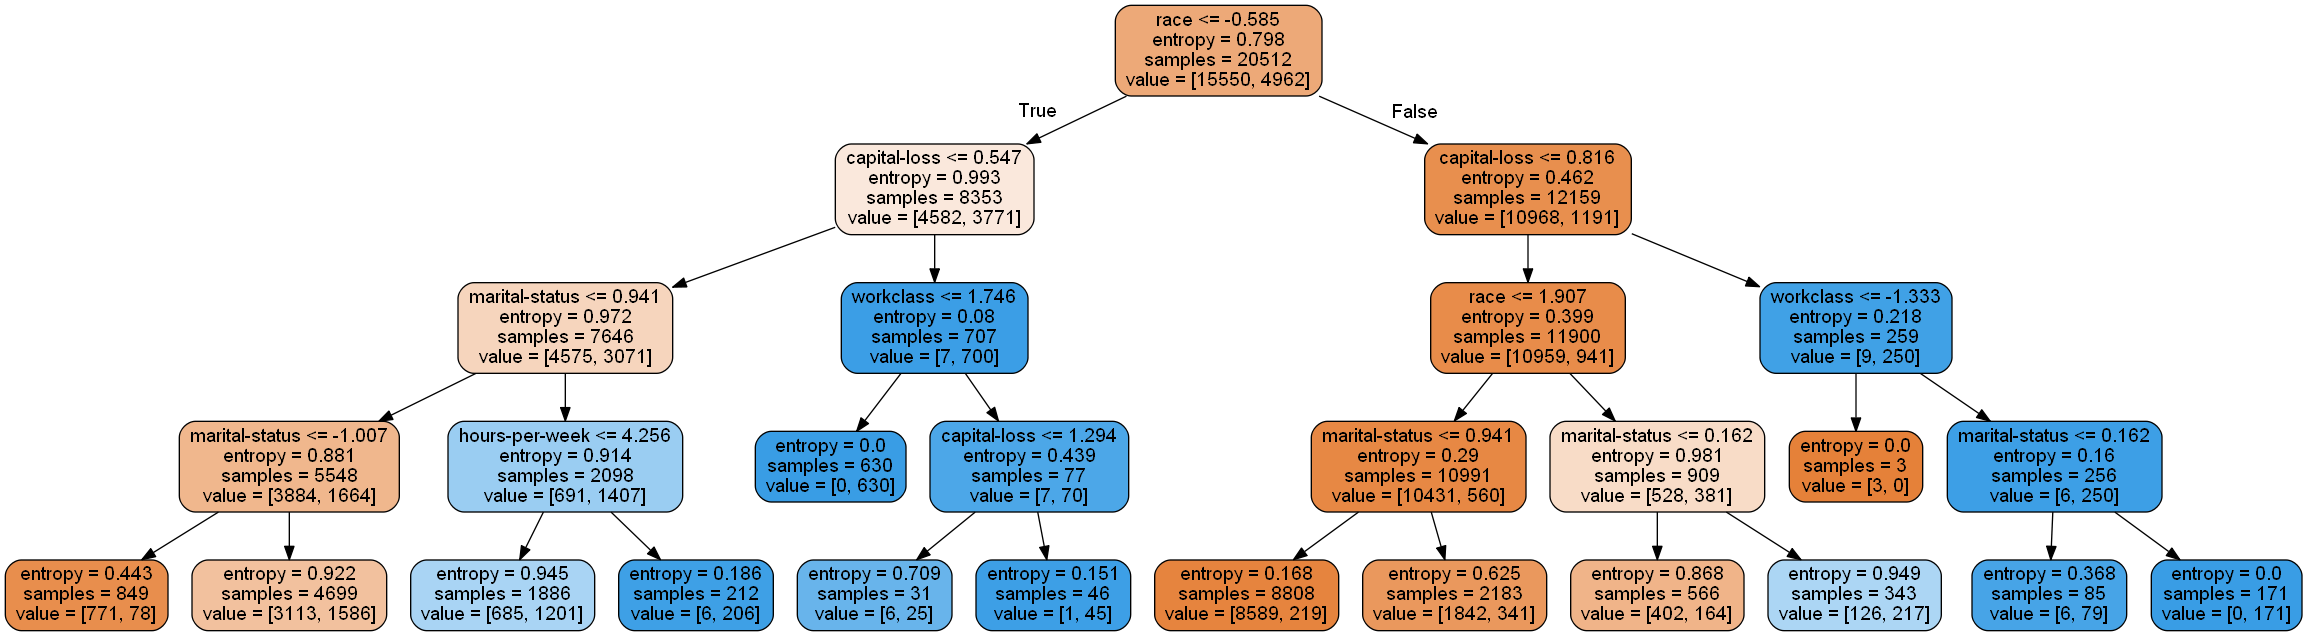

In [139]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus,graphviz
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# Putting features
features = list(income_copy.columns[1:])
features

dot_data = StringIO()  
export_graphviz(decisionTreeMax, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [140]:
%%time

#Decision trees - Parameter tuning

tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  

locally_best_tree.fit(X_train, y_train)
print("Best cross validaton score", locally_best_tree.best_score_)

Best cross validaton score 0.8527203588143526
Wall time: 1.43 s


<a id="gradientBoosting"></a>

### 4) Gradient Boosting

In [141]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [142]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate = 0.1, n_estimators = 100)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_trainXGB = classifier.predict(X_train)
y_pred_testXGB = classifier.predict(X_test)

print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_train,y_pred_trainXGB)))
print('Gradient Boosting accuracy score for Test data: {0:0.4f}'.format(accuracy_score(y_test,y_pred_testXGB)))

Gradient Boosting accuracy score for Train data: 0.8652
Gradient Boosting accuracy score for Test data: 0.8662


In [143]:
predictionGB = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_testXGB.flatten()})
predictionGB.head(20)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


<a id="comparisonML"></a>

### Comparing the accuracy scores for each ML algorithm

In [144]:
print('Logistic Regression accuracy score with all features for Train data: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Logistic Regression accuracy score with all features for Test data: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('\n')
print('Logistic Regression accuracy score with PCA (3 features) for Train data: {0:0.4f}'. format(accuracy_score(y_train_3features, y_pred_train5)))
print('Logistic Regression accuracy score with PCA (3 features) for Test data: {0:0.4f}'. format(accuracy_score(y_test_3features, y_pred_test5)))
print('\n')
print('Logistic Regression accuracy score with PCA (5 features) for Train data: {0:0.4f}'. format(accuracy_score(y_train_5features, y_pred_train5)))
print('Logistic Regression accuracy score with PCA (5 features) for Test data: {0:0.4f}'. format(accuracy_score(y_test_5features, y_pred_test5)))
print('\n')
print('Logistic Regression accuracy score with PCA (7 features) for Train data: {0:0.4f}'. format(accuracy_score(y_train_7features, y_pred_train7)))
print('Logistic Regression accuracy score with PCA (7 features) for Test data: {0:0.4f}'. format(accuracy_score(y_test_7features, y_pred_test7)))
print('\n')
print('Logistic Regression accuracy score with PCA (10 features) for Train data: {0:0.4f}'. format(accuracy_score(y_train_10features, y_pred_train10)))
print('Logistic Regression accuracy score with PCA (10 features) for Test data: {0:0.4f}'. format(accuracy_score(y_test_10features, y_pred_test10)))
print('\n')
print('Decision Tree accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_train,tree_prediction_trainM)))
print('Decision Tree accuracy score for Test data: {0:0.4f}'.format(accuracy_score(y_test, tree_prediction_testM)))
print('\n')
print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_train,y_pred_trainXGB)))
print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_test,y_pred_testXGB)))

Logistic Regression accuracy score with all features for Train data: 0.8242
Logistic Regression accuracy score with all features for Test data: 0.8319


Logistic Regression accuracy score with PCA (3 features) for Train data: 0.8120
Logistic Regression accuracy score with PCA (3 features) for Test data: 0.8159


Logistic Regression accuracy score with PCA (5 features) for Train data: 0.8120
Logistic Regression accuracy score with PCA (5 features) for Test data: 0.8159


Logistic Regression accuracy score with PCA (7 features) for Train data: 0.8201
Logistic Regression accuracy score with PCA (7 features) for Test data: 0.8248


Logistic Regression accuracy score with PCA (10 features) for Train data: 0.7973
Logistic Regression accuracy score with PCA (10 features) for Test data: 0.8040


Decision Tree accuracy score for Train data: 0.8431
Decision Tree accuracy score for Test data: 0.8475


Gradient Boosting accuracy score for Train data: 0.8652
Gradient Boosting accuracy score for Tra

<a id="requiredFunction"></a>

## Required function

In [145]:
# PLEASE, compile all of the lines written above in order to work. I didn't import the libraries and all the required packages, \
# so please compile the code.

def functionToPredict(dataframe):
    df = pd.read_csv(dataframe)
    if df.columns[0]!='age':
        df = df.drop(columns=['Unnamed: 0'])
    df.replace(" ?", np.nan, inplace = True)
    workclass_mode = df['workclass'].mode()
    occupation_mode = df['occupation'].mode()
    native_country_mode = df['native-country'].mode()
    df = df.drop(columns=['education'])
    df.workclass.replace(np.nan, workclass_mode[0], inplace = True)
    df.occupation.replace(np.nan, occupation_mode[0], inplace = True)
    df['native-country'].replace(np.nan, native_country_mode[0], inplace = True)
    
    df_copy = df.copy()
    
    df_copy.workclass = df_copy.workclass.astype('category')
    df_copy.workclass = df_copy.workclass.cat.codes

    df_copy['marital-status'] = df_copy['marital-status'].astype('category')
    df_copy['marital-status'] = df_copy['marital-status'].cat.codes

    df_copy.occupation = df_copy.occupation.astype('category')
    df_copy.occupation = df_copy.occupation.cat.codes

    df_copy.relationship = df_copy.relationship.astype('category')
    df_copy.relationship = df_copy.relationship.cat.codes

    df_copy.race = df_copy.race.astype('category')
    df_copy.race = df_copy.race.cat.codes

    df_copy.sex = df_copy.sex.astype('category')
    df_copy.sex = df_copy.sex.cat.codes

    df_copy['native-country'] = df_copy['native-country'].astype('category')
    df_copy['native-country'] = df_copy['native-country'].cat.codes

    df_copy.label = df_copy.label.astype('category')
    df_copy.label = df_copy.label.cat.codes
    
    # Building the model
    # Putting independent variables/features to X
    X = df_copy.drop(columns = 'label')

    # Putting response/dependent variable/feature to y
    y = df_copy.label
    
    # Splitting the data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    
    # Feature scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

    logisticRegression = LogisticRegression(solver='lbfgs')
    logisticRegression.fit(X_train, y_train)

    y_pred_train = logisticRegression.predict(X_train)
    y_pred_test = logisticRegression.predict(X_test)

    print('Method 1: Logistic Regression')
    #predictionLR = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_test.flatten()})
    predictionLR = pd.DataFrame({'Predicted': y_pred_test.flatten()})
    display(predictionLR)
    print('Logistic Regression accuracy score with all features for Train data: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
    print('Logistic Regression accuracy score with all features for Test data: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
    print('\n')
    print('Method 2: Decision Trees')
    
    decisionTreeMax = DecisionTreeClassifier(criterion='entropy',max_depth=4)
    decisionTreeMax.fit(X_train, y_train)

    tree_prediction_trainM = decisionTreeMax.predict(X_train)
    tree_prediction_testM = decisionTreeMax.predict(X_test) 

    #predictionDT = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted':tree_prediction_testM.flatten()})
    predictionDT = pd.DataFrame({'Predicted':tree_prediction_testM.flatten()})
    display(predictionDT)
    print('Decision tree accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_train,tree_prediction_trainM)))
    print('Decision tree accuracy score for Test data: {0:0.4f}'.format(accuracy_score(y_test, tree_prediction_testM)))

    print('\n')
    print('Method 3: Gradient Boosting')
    from xgboost import XGBClassifier
    classifier = XGBClassifier(learning_rate = 0.1, n_estimators = 100)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred_trainXGB = classifier.predict(X_train)
    y_pred_testXGB = classifier.predict(X_test)

    #predictionGB = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_testXGB.flatten()})
    predictionGB = pd.DataFrame({'Predicted': y_pred_testXGB.flatten()})
    display(predictionGB)
    print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_train,y_pred_trainXGB)))
    print('Gradient Boosting accuracy score for Test data: {0:0.4f}'.format(accuracy_score(y_test,y_pred_testXGB)))
    
# Use the functionToPredict, with the dataset as a parameter  
# The function will work only if the first line of our dataframe contains the name of the columns ('age','workclass' etc.)
# Please, make sure that in the dataset, the first line contains the name of the columns

# Example of use: functionToPredict('income-test.csv') 
functionToPredict('data_train.csv') # modify the parameter 


Method 1: Logistic Regression


C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Raluca\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.


,Predicted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Logistic Regression accuracy score with all features for Train data: 0.8242
Logistic Regression accuracy score with all features for Test data: 0.8319


Method 2: Decision Trees


,Predicted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Decision tree accuracy score for Train data: 0.8431
Decision tree accuracy score for Test data: 0.8475


Method 3: Gradient Boosting


,Predicted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Gradient Boosting accuracy score for Train data: 0.8652
Gradient Boosting accuracy score for Test data: 0.8662


# Conclusions

The project followed the steps provided in the written test. 

[Step 1](#Step1) was all about importing the required libraries and loading the dataset.

[Step 2](#Step2) was dedicated to exploring our data, finding the key statistics and also removing a column that was not of interest ('Unnamed: 0')

[Step 3](#Step3) was the most challenging and difficult part of this project: *Data Cleaning*, since it was the most time consuming task for me. I noticed that our dataset had some missing values which were hard to spot, especially because of the ' ?' character. I decided to convert them into a null value, to check again the data for null values, analysed the impact of those missing values on my data. I decided to fill those missing values with the mode of those columns. I thought that dropping the rows with those missing values wouldn't be so efficient. I also noticed that two columns ('education' and 'education-num') are identical ('education' was the string representation of 'education-num'), so I chose to drop that categorical column and carry on with the 'education-num'.

[Step 4](#Step4) consisted of converting the categorical columns into numerical ones. In order to do this thing, I decided to create a copy of my initial dataset. 

[Step 5](#Step5) was about Data Visualization. I've made a few observations about the following plots:
- [Age vs. Income](#ageVSincome)
- [Education vs. Income](#educationVSincome)
- [Sex vs. Income](#sexVSincome)
- [Occupation vs. Income](#occupationVSincome)
- [Race vs. Income](#raceVSincome)

In [Step 6](#Step6), I tried to figure out what the correlation between the variables would be after all the modifications made to the dataset.

And finally, [Step 7](#Step7) was all about building some Machine Learning algorithms and comparing them. So, I've decided to test my model on several algorithms: 
- [Logistic Regression for all Features](#logisticRegressionAll)
- [Logistic Regression with PCA](#logisticRegressionPCA)
- [Decission Trees using Entropy](#decisionTrees), plotting the decision tree as well
- [Gradient Boosting](#gradientBoosting) that predicted the highest accuracy
* Finally, I [compared all of these models](#comparisonML) printing the accuracy score for training data and test data.

If you want to test the data, you can use the function declared [below](#requiredFunction).

According to the comparison, Decision Trees and Gradient Boosting are the algorithms that display the highest accuracy of the built model, but that doesn't mean Logistic Regression will be an avoidable algorithm.


# Exercise 2.

In [146]:
income_more_than_50k = income_copy[income_copy.label==1].copy()
income_more_than_50k

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
3,57,5,353808,10,2,11,0,4,1,0,0,60,38,1
5,37,4,26698,10,2,11,0,4,1,0,1485,44,38,1
8,39,0,184964,10,0,0,1,4,1,0,0,40,38,1
15,43,3,124692,13,2,11,0,4,1,0,0,40,38,1
21,38,3,65324,15,2,9,0,4,1,0,0,40,38,1
34,58,6,400285,9,2,0,0,2,1,0,0,40,38,1
38,45,3,114032,15,2,9,0,4,1,0,0,60,38,1
44,38,3,682947,13,0,3,1,4,1,0,0,55,38,1
48,45,3,33300,11,2,11,0,4,1,0,1977,50,38,1
54,33,6,208785,10,5,9,1,4,1,10520,0,40,38,1


In [147]:
income_more_than_50k[['age', 'workclass', 'fnlwgt', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','label']].corr()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
age,1.000000,0.045867,-0.065753,-0.021592,-0.042821,-0.002976,-0.114739,0.047308,0.088818,0.055199,0.023600,-0.121499,0.004113,NaN
workclass,0.045867,1.000000,-0.012722,0.030274,-0.007233,0.032669,-0.030766,0.039611,0.054185,0.059303,0.029204,0.076409,-0.010593,NaN
fnlwgt,-0.065753,-0.012722,1.000000,-0.002137,0.011342,0.020672,-0.006838,-0.024480,0.010235,0.008655,-0.010417,0.000655,-0.019086,NaN
education-num,-0.021592,0.030274,-0.002137,1.000000,0.039583,0.136949,0.005560,-0.008307,-0.035500,0.106959,0.057096,0.061826,-0.033621,NaN
marital-status,-0.042821,-0.007233,0.011342,0.039583,1.000000,0.035362,0.019069,-0.004093,-0.051783,0.018532,0.018808,-0.022805,-0.013276,NaN
occupation,-0.002976,0.032669,0.020672,0.136949,0.035362,1.000000,-0.049637,0.005977,0.044751,0.024028,0.010942,0.016315,-0.008597,NaN
relationship,-0.114739,-0.030766,-0.006838,0.005560,0.019069,-0.049637,1.000000,-0.053742,-0.831608,0.002030,-0.013389,-0.195036,-0.027676,NaN
race,0.047308,0.039611,-0.024480,-0.008307,-0.004093,0.005977,-0.053742,1.000000,0.047507,-0.016181,0.004098,0.019963,0.202696,NaN
sex,0.088818,0.054185,0.010235,-0.035500,-0.051783,0.044751,-0.831608,0.047507,1.000000,-0.008449,0.014714,0.188653,0.014298,NaN
capital-gain,0.055199,0.059303,0.008655,0.106959,0.018532,0.024028,0.002030,-0.016181,-0.008449,1.000000,-0.090549,0.055805,0.010838,NaN


This method doesn't work, because the label is NaN. The standard deviation appears in the denominator and for all same values of labels, it becomes zero hence the fraction becomes NaN. Thus, we cannot plot even the correlation matrix, so we must find another method to handle this situation and to find the best features in our data.

## Feature importance

Next, to be able to realize which features are very important for us, we will use the 3 selected algorithms (Logistic Regression for all features, Decision Trees and Gradient Boosting).

**Feature importance** is the importance measure of features in the feature selection process.

>50K  rate : %23.94
<=50K rate : %76.06


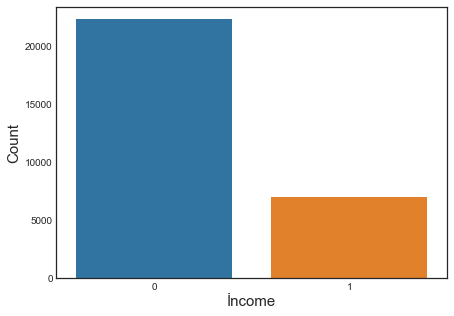

In [148]:
plt.figure(figsize=(7,5))
sns.countplot(income_copy.label)
plt.xlabel("İncome",fontsize=15)
plt.ylabel("Count",fontsize=15)
print(">50K  rate : %{:.2f}".format(sum(income_copy.label)/len(income_copy.label)*100))
print("<=50K rate : %{:.2f}".format((len(income_copy.label)-sum(income_copy.label))/len(income_copy.label)*100))

- 23.94% of the data in the data set is classified as positive (the income is greater than $50K). Therefore we can say that the data set is not balanced.

## 1) Decision Trees

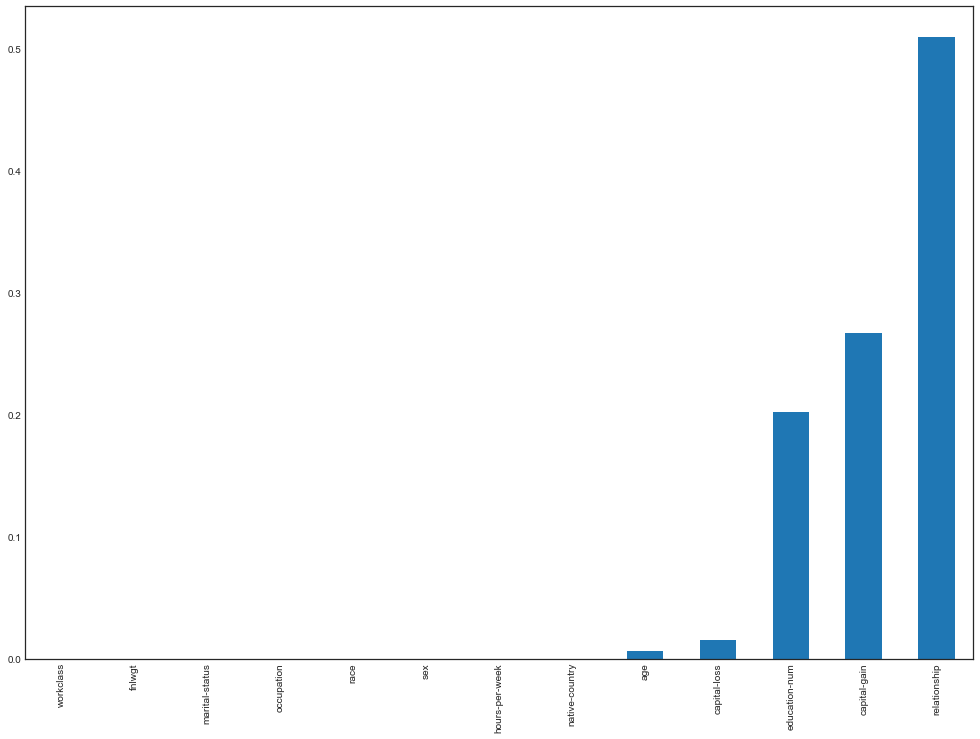

In [149]:
coefs = pd.Series(decisionTreeMax.feature_importances_, index=X_train.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()

In the Decision Trees algorithm, we got that 'relationship', 'capital-gain', 'education-num', 'capital-loss' and 'age' are the main features used for prediction.

## 2) Gradient Boosting

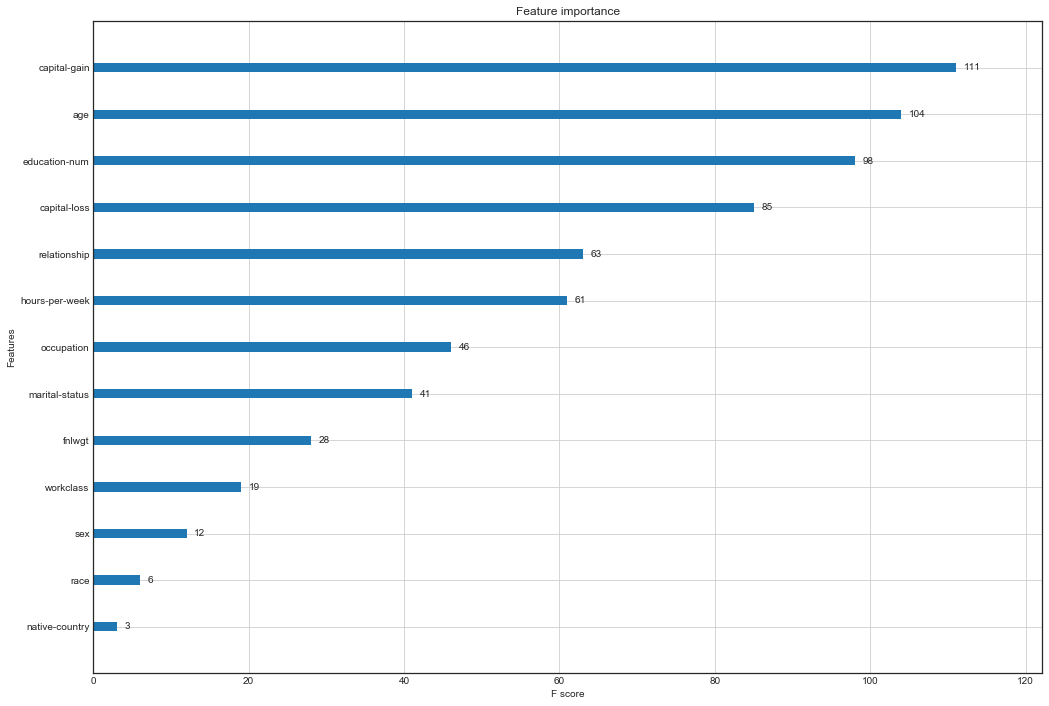

In [150]:
from xgboost import plot_importance

plot_importance(classifier)

In the Gradient Boosting algorithm (with the highest accuracy though), we obtained that 'capital-gain', 'age', 'education-num' and the 'capital-loss' are the main features. Gradient Boosting is used to plot the feature importance bar graph. From this feature importance, graph as shown, it can be inferred that the Capital gain is the most important feature which is followed by the Age, Education Num. Native country has the least importance as compared to the other features.

C:\Users\Raluca\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


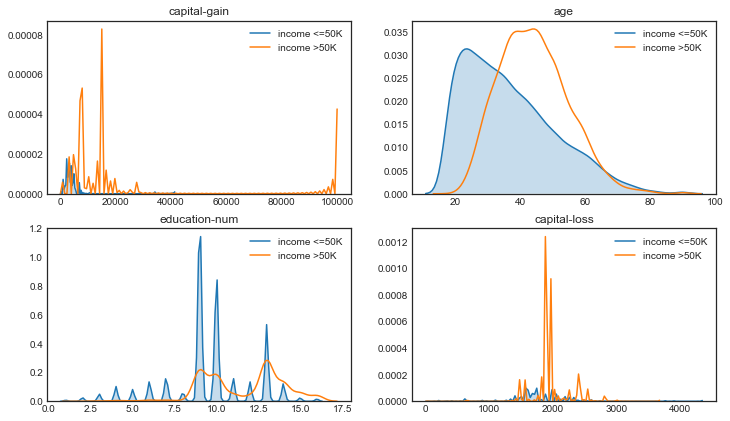

In [151]:
plt.figure(figsize=[12, 7])
plt.subplot(221)

i=0
for x in ['capital-gain', 'age', 'education-num','capital-loss']:
    plt.subplot(2, 2, i+1)
    i += 1
    ax1=sns.kdeplot(income_copy[income_copy['label'] == 0][x], shade=True,label="income <=50K")
    sns.kdeplot(income_copy[income_copy['label'] == 1][x], shade=False,label="income >50K", ax=ax1)
    plt.title(x,fontsize=12)

plt.show()

<a id="workclassVSincome50k"></a>

### Workclass vs. Income

In [152]:
fed_gov = 100*income_more_than_50k[income_more_than_50k.workclass==0]['workclass'].count()/income_more_than_50k.shape[0]
local_gov = 100*income_more_than_50k[income_more_than_50k.workclass==1]['workclass'].count()/income_more_than_50k.shape[0]
never_worked = 100*income_more_than_50k[income_more_than_50k.workclass==2]['workclass'].count()/income_more_than_50k.shape[0]
private = 100*income_more_than_50k[income_more_than_50k.workclass==3]['workclass'].count()/income_more_than_50k.shape[0]
self_emp_inc = 100*income_more_than_50k[income_more_than_50k.workclass==4]['workclass'].count()/income_more_than_50k.shape[0]
self_emp_not_inc = 100*income_more_than_50k[income_more_than_50k.workclass==5]['workclass'].count()/income_more_than_50k.shape[0]
state_gov = 100*income_more_than_50k[income_more_than_50k.workclass==6]['workclass'].count()/income_more_than_50k.shape[0]
without_pay = 100*income_more_than_50k[income_more_than_50k.workclass==7]['workclass'].count()/income_more_than_50k.shape[0]

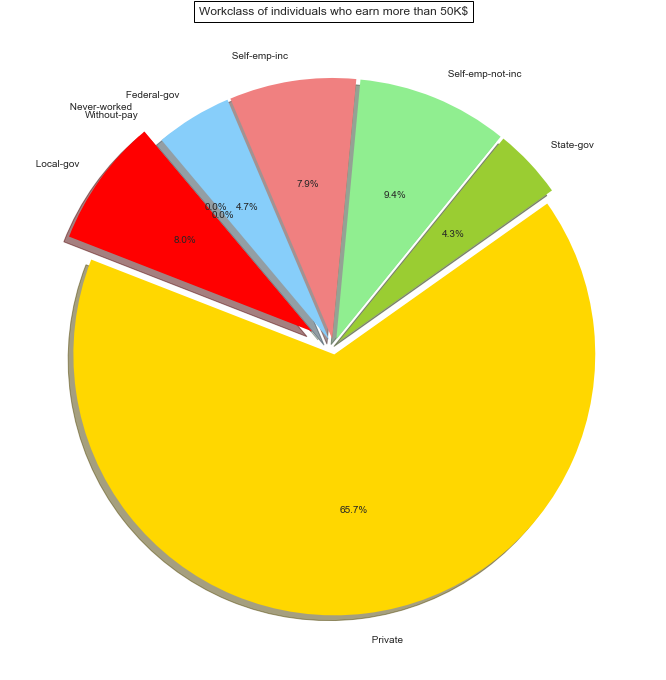

In [153]:
languages = ' Local-gov', ' Private', ' State-gov', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', 'Without-pay',' Never-worked'
popuratity = [local_gov, private, state_gov, self_emp_not_inc, self_emp_inc, fed_gov, without_pay, never_worked]
#colors = ['red', 'gold', 'yellowgreen', 'blue', 'lightcoral', 'lightskyblue']
colors = ['red', 'gold', 'yellowgreen', 'lightgreen', 'lightcoral', 'lightskyblue','lightgreen','lightpink']
# explode 1st slice
explode = (0.1, 0.03, 0.03, 0.03, 0.03, 0.03,0.06,0.1)  
# Plot
plt.pie(popuratity, explode=explode, labels=languages, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=130)
plt.title("Workclass of individuals who earn more than 50K$", bbox={'facecolor':'1', 'pad':5})
plt.show()

The majority of people who earn more than 50K$ work in private sector.

# Conclusion

From the [Education vs. Income](#educationVSincome) graphs, we conclude that the income is closely linked to the level of education a person holds. We noticed some interesting things there: only a small proportion of people with less than 12 years of education earn more than \\$50k a year. This proportion increases almost linearly after 12 years of education. So, a person who wants to earn more than \\$50K should hold Bachelor, PhDs, HS-degree, Masters, Prof-school degree, more advanced studies (above Bachelor in general). 
After 14 years of education, more than 50% of the people earn > $50k a year. So, based on our plots, we can conclude that a person who has more than 13 years of education, presents a very high chance to earn more than \\$50K. A higher level of education is correlated to a higher percentage of individuals with the label >50k.

From the [Age vs. Income](#ageVSincome) graph, we can notice that the median age for people earning more than \\$50k is significantly greater than the median age of people earning less than $50k. So, older people are more likely to earn more than 50k dollars a year as compared to their younger counterparts, reaching the plateau (peak/highest salary) at 38 years old.

The plot from [Hours per Week vs. Income](#hoursperweekVSincome) shows that the people who put more time per week into their work, appear to earn more. Additionally, there are many outliers in both groups which represent high variations in both the groups (which makes sense, since there are some hectic jobs that pay less and other easy jobs that generally pay more). The interquartile range is also observed to be much smaller for those who earn less. That means that people who earn less than $50k per year have less spread in the hours they work per week.

Regarding the [Relationship and Marital Status](#relationship), we saw that married people tend to have higher incomes (maybe working hard to support their family or maybe because they're living a happy and fulfilled personal life).

In case of [Race](#raceVSincome) and [Sex](#sexVSincome), Whites and Asian-Pacific-Islanders earn higher compared to other races, while men earn more compared to women.




**Tips for an individual who wants to earn more than $50K**:

- The more educated you are, the more likely you will have higher incomes. Education is the key! Higher education may provide better earnings. Start a Bachelor, Masters or even a PHD. 

- Capital gain is accounts for ~15% of the variation. This implies that improving access to capital is a key factor in improving income.

- Work in private sector! People working in private sector earn significantly better than the ones in other classes.

- Work hard! Surround yourself with good people, gain experience and knowledge and become better in the field you want. Work more hours per week. After several years, the working hours will be more flexible.

- Work in a executive managerial position or even as a professor (with specialty). These two jobs stand out as having very high percentages of individuals making over $50,000

- Around the age of 38-44, you will have the desired salary, but in order to increase your chances for this, take into account the advice given above.



P.S.: If you want to test the function for the first exercise, you can click [here](#requiredFunction).


Raluca-Andreea Gînga

Licență, Grupa MI531